In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from scipy import signal
from astroquery.mast import Observations
import lightkurve as lk
from astropy.timeseries import LombScargle
import astropy.units as u
from scipy.ndimage import gaussian_filter1d
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
import matplotlib.gridspec as gridspec
from matplotlib.ticker import AutoMinorLocator



plt.style.use('/Users/lib278/Code/Python3/mpl_stylefiles/mystyle.mplstyle')

Bad value in file '/Users/lib278/Code/Python3/mpl_stylefiles/mystyle.mplstyle', line 17 ("mathtext.fallback: dejavsans  # Select fallback font from ['cm' (Computer Modern), 'stix'"): Key mathtext.fallback: dejavsans is not a valid fallback font name. Valid fallback font names are cm,stix,stixsans. Passing 'None' will turn fallback off.


In [15]:
test_target = 'Ass Cha T 1-27'

datalist = lk.search_targetpixelfile(test_target) 
datalist


#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 19,2019,SPOC,120,59879081,0.0
1,TESS Sector 43,2021,SPOC,120,59879081,0.0
2,TESS Sector 44,2021,SPOC,120,59879081,0.0
3,TESS Sector 19,2019,TESS-SPOC,1800,59879081,0.0
4,TESS Sector 43,2021,TESS-SPOC,600,59879081,0.0
5,TESS Sector 44,2021,TESS-SPOC,600,59879081,0.0


In [10]:
test_mission = 'TESS'
test_mission = 'K2'

test_cadenceno = 43

if test_mission == 'TESS':
    test_author = 'SPOC'
    test_author = 'TESS-SPOC'
    test_cadence = 'TESS Sector ' + str(test_cadenceno)
    test_exptime = 600
if test_mission == 'K2':
    test_author = 'K2'
    test_cadence = 'K2 Campaign ' + str(test_cadenceno)
    test_exptime = 1800


tpf = datalist[(datalist.author == test_author) & (datalist.exptime == test_exptime*u.second)][0].download()[200]
# tpf.flux.value

In [11]:
# os.environ['BOKEH_ALLOW_WS_ORIGIN'] = 'vscode-webview://0e8ruls24cduomnhi37gudh93m703t5kvpq0qbl4li5j0mk8lp3h'

In [12]:
# tpf.interact()

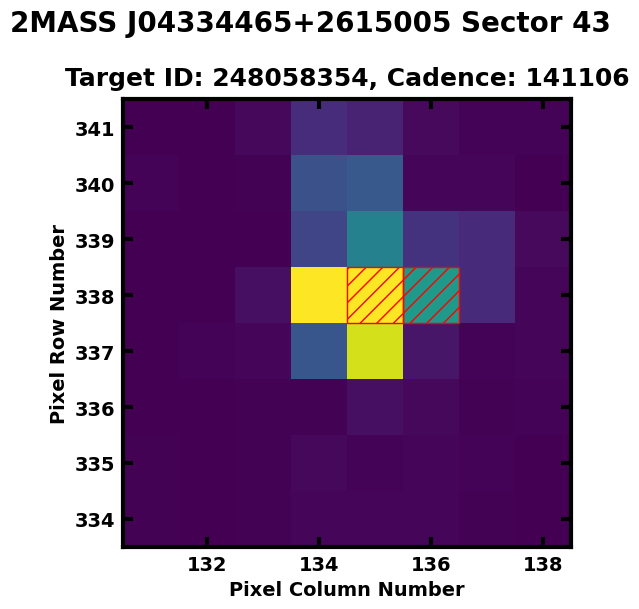

In [14]:
fig = plt.figure(figsize=(6, 6.2))
ax = fig.add_subplot(111)
fig.suptitle(test_target + ' Sector ' + str(int(test_cadenceno)), fontsize=20)
tpf.plot(ax=ax, aperture_mask='pipeline', title=None, show_colorbar=False, )  # , scale='log')
fig.tight_layout()
plt.show()

/Users/lib278/opt/anaconda3/envs/pyKLIP/lib/python3.9/site-packages/lightkurve/targetpixelfile.py:1929: RuntimeWarning: All-NaN slice encountered
  vmin=np.nanmin(self.flux[0].value), vmax=np.nanmax(self.flux[0].value)


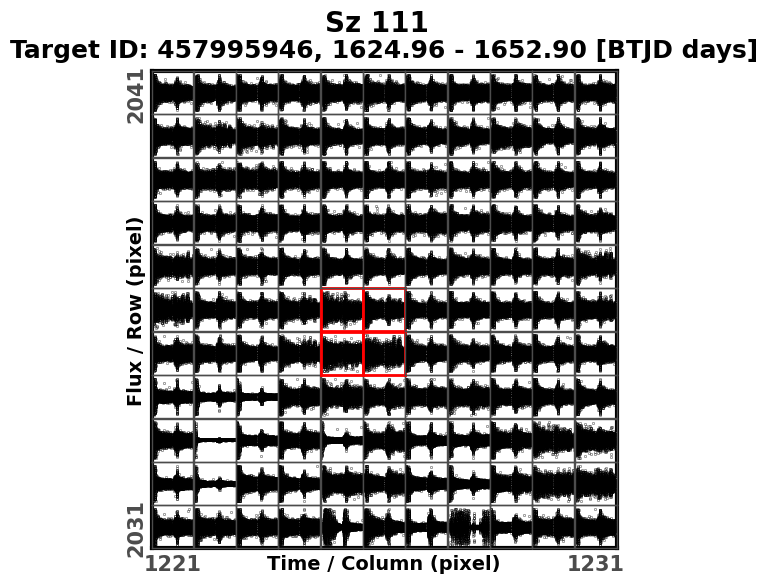

In [67]:
fig = plt.figure(figsize=(6, 6.2))
ax = fig.add_subplot(111)
fig.suptitle(test_target, fontsize=20)
tpf.plot_pixels(ax=ax, corrector_func=lambda x: x.remove_nans().flatten().remove_outliers(), show_flux=True, title=None, aperture_mask='pipeline')
plt.show()